# Covid 19 Contact Tracing with Machine Learning Using DBSCAN
Contact tracing is a process used by public health ministries to help stop the spread of infectious disease, such as COVID-19, within a community.

# How Contact Tracing Works?
Once a person is positive for coronavirus, it is very important to identify other people who may have been infected by the patients diagnosed. To identify infected people, the authorities follow the activity of patients diagnosed in the last 14 days. This process is called contact tracking. Depending on the country and the local authority, the search for contacts is carried out either by manual methods or by numerical methods.

# Contact Tracing with Machine Learning Using DBSCAN
DBSCAN is a density-based data clustering algorithm that groups data points in a given space. The DBSCAN algorithm groups data points close to each other and marks outlier data points as noise. I will use the DBSCAN algorithm for the task of contact tracing with Machine Learning.

# About DBSCAN: 
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used in machine learning to group together data points that are close to each other. It was introduced by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996.

DBSCAN is a density-based clustering algorithm, which means that it identifies clusters based on the density of data points in the feature space. It works by defining a neighborhood around each data point and identifying clusters as areas of high density separated by areas of low density.

The algorithm takes two parameters as input - ε (epsilon) and MinPts. Epsilon is the radius of the neighborhood around each data point, and MinPts is the minimum number of data points required to form a cluster.

The algorithm starts by randomly selecting a data point and checking whether there are enough points within its ε-neighborhood to form a cluster. If there are, the algorithm expands the cluster by recursively adding neighboring points until no more points can be added. This forms a single cluster. If there are not enough points within the ε-neighborhood, the data point is labeled as noise.

The algorithm then repeats this process for all remaining data points, skipping over any points that have already been assigned to a cluster.

DBSCAN is capable of finding clusters of arbitrary shape, unlike traditional clustering algorithms like K-means which can only find spherical clusters. Additionally, it is robust to noise and outliers in the data, as noise points are not assigned to any cluster.

Overall, DBSCAN is a powerful and efficient clustering algorithm that is widely used in machine learning applications for tasks such as image segmentation, anomaly detection, and recommendation systems.


# Packages

In [16]:
import pandas as pd
from sklearn.cluster import DBSCAN
from math import radians
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_json("livedata.json")
df.head(20)

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273
5,Erin,2020-07-04 14:35:30,13.132235,77.694382
6,Bob,2020-07-04 13:35:30,13.224501,77.668313
7,Grace,2020-07-04 14:35:30,13.142778,77.691560
8,Alice,2020-07-04 22:35:30,13.090368,77.561579
9,Frank,2020-07-04 12:35:30,13.208293,77.664607


Now, let’s analyze the dataset using the scatter plot showing the ids with their latitudes and longitudes on the x-axis and the Y-axis respectively:

C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

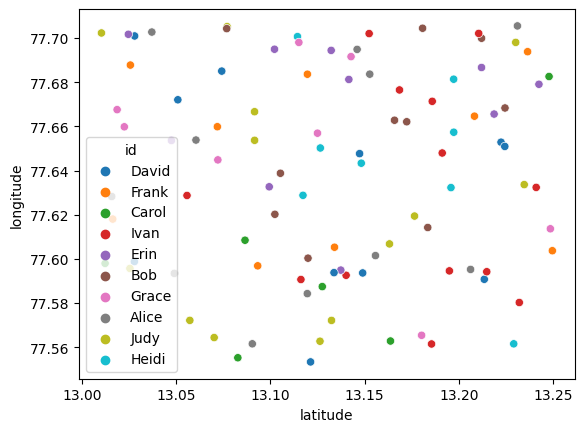

In [18]:
sns.scatterplot(data=df,x='latitude',y='longitude',hue='id')
plt.show()

# Creating a Model for Contact Tracing with Machine Learning
Now let’s create a model for contact tracing using the DBSCAN model. The function below will help us to create the DBSCAN model, using this model we will generate clusters, which will help identify infections by filtering the data in the clusters:

DBSCAN is a clustering algorithm that stands for Density-Based Spatial Clustering of Applications with Noise. It groups together data points that are close to each other in space and forms clusters based on their density.                                    
- eps is a hyperparameter of the DBSCAN algorithm that defines the radius of the neighborhood around each data point. It determines how far apart data points can be and still be considered part of the same cluster. Here, it is set to epsilon, which is the distance (in kilometers) that corresponds to a radius of 6 feet.                                                 
- min_samples is another hyperparameter of the DBSCAN algorithm that specifies the minimum number of data points needed to form a cluster. Here, it is set to 2, meaning that at least 2 data points are required to form a cluster.                                  
- metric is the distance metric used to calculate the distance between two data points. Here, it is set to 'haversine', which is a distance metric commonly used for geographic data. It calculates the great-circle distance between two points on a sphere given their longitudes and latitudes.                                                         
- fit() is a method of the DBSCAN class that fits the model to the input data. Here, the input data is a Pandas DataFrame df containing columns for 'latitude' and 'longitude'.                                               
- model.labels_ is an attribute of the DBSCAN model that returns the cluster labels assigned to each data point. It is an array of integers where each - integer corresponds to the cluster label assigned to the corresponding row in df.                                     
- tolist() is a method of the NumPy array returned by model.labels_ that converts it to a Python list.                                 
- df['cluster'] is a new column added to the df DataFrame that contains the cluster labels assigned by the DBSCAN algorithm to each row of the DataFrame.
                                                                                    
In summary, this line of code uses the DBSCAN algorithm to cluster the latitude and longitude coordinates in the df DataFrame into groups based on their density. It then adds a new column to the df DataFrame that contains the cluster labels assigned by the algorithm.

# For loop:    
input_name_cluster = []                                               
    for i in range(len(df)):                                             
        if df['id'][i] == input_name:                                            
            if df['cluster'][i] in input_name_cluster:                                      
                pass                                                      
            else:                                                                 
                input_name_cluster.append(df['cluster'][
                       
For each row where the 'id' column matches input_name, it checks if the value in the 'cluster' column for that row is already in the input_name_clusters list. If it is, the code simply continues to the next iteration of the loop using the pass keyword. If the value is not already in the input_name_clusters list, then it appends the value to the list using the append() method.

This code essentially creates a list of all the unique clusters that contain at least one data point with the given input_name. It is necessary to keep track of these clusters so that the function can later identify all the other individuals who were also present in these clusters and might have been infected by the same individual.

# Infect_name Code:   
infected_names = []                                                                
    for cluster in input_name_clusters:                                                                
        if cluster != -1:                                                            
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']                                                 
            for i in range(len(ids_in_cluster)):                                                             
                member_id = ids_in_cluster.iloc[i]                                                                
                if (member_id not in infected_names) and (member_id != input_name):                                        
                    infected_names.append(member_id)                                                    
                else:                                                         
                    pass                                                     
    return infected_names                                                           

This code snippet creates an empty list infected_names,which will be populated with the names of all individuals who are potentially infected by the individual with the given input_name.

The code then iterates over each cluster in the input_name_clusters list. For each cluster, it checks if the cluster label is not -1 (which means that the data point did not belong to any cluster). If the cluster label is not -1, it extracts all the id values from the df DataFrame that belong to that cluster using the loc() method.

Then, for each id value in the ids_in_cluster list, the code checks if it is not equal to the input_name value (since we don't want to add the input individual to the infected_names list). If the id value is not already in the infected_names list, then it is appended to the list using the append() method.

The final step is to return the infected_names list, which contains the names of all individuals who are potentially infected by the individual with the given input_name.

In [19]:
def get_infected_names(input_name):

    epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=3, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names
print(get_infected_names("David"))

[]


# Tracing Infected People
To find people who may be infected by the patient, we’ll just call the get_infected_names function and enter a name from the dataset as a parameter:

In [20]:
print(get_infected_names("Erin"))

[]


In [21]:
df

,id,timestamp,latitude,longitude,cluster
0,David,2020-07-04 15:35:30,13.148953,77.593651,-1
1,David,2020-07-04 16:35:30,13.222397,77.652828,-1
2,Frank,2020-07-04 14:35:30,13.236507,77.693792,-1
3,Carol,2020-07-04 21:35:30,13.163716,77.562842,-1
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273,-1
...,...,...,...,...,...
95,Judy,2020-07-04 16:35:30,13.176481,77.619396,-1
96,Bob,2020-07-04 15:35:30,13.172339,77.662080,-1
97,Grace,2020-07-04 23:35:30,13.115079,77.697991,-1
98,Bob,2020-07-04 19:35:30,13.180751,77.704404,-1


# Now, let’s generate clusters using our model:

C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_catego

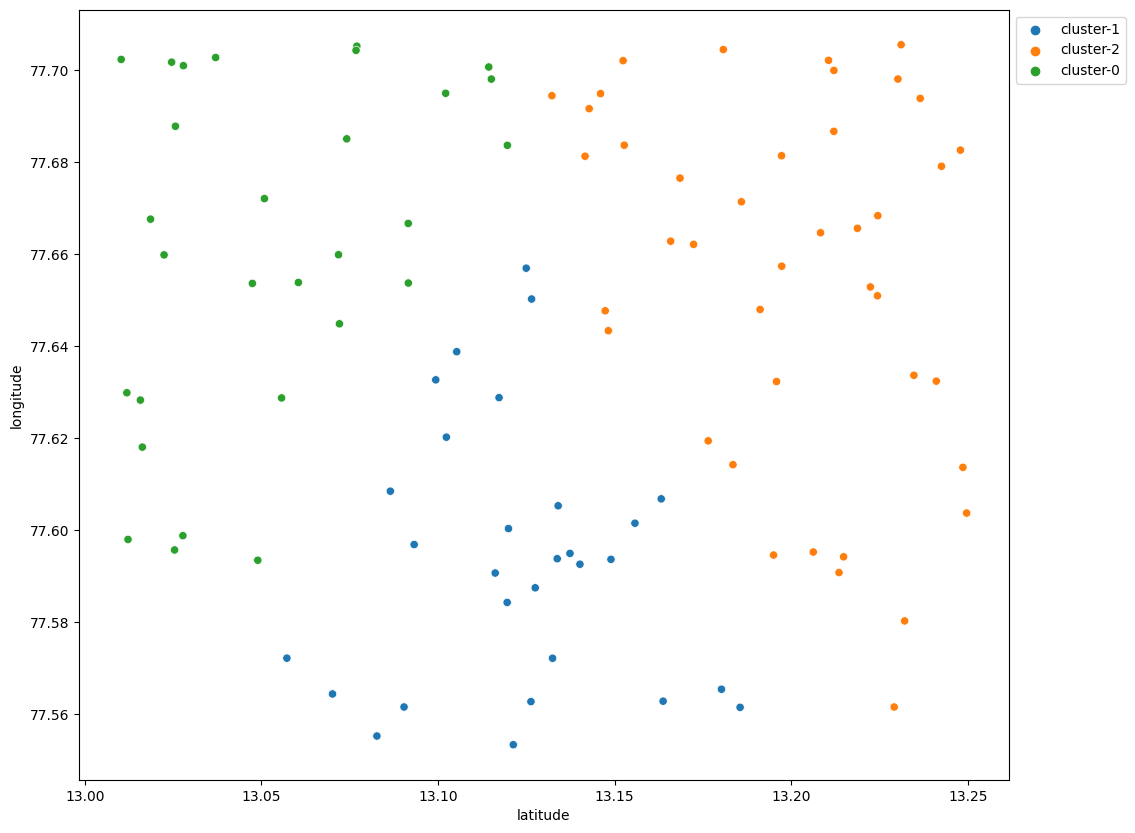

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Create a K-Means model and fit it to your data
model = KMeans(n_clusters=3)
model.fit(df[['latitude', 'longitude']])

# Get cluster labels
labels = model.labels_

# Plot the data with cluster labels
fig = plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='latitude', y='longitude', hue=['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

In [23]:
import pandas as pd
from sklearn.cluster import DBSCAN
from math import radians
# convert degrees to radians for latitude and longitude
df = pd.read_json("livedata.json")
df['latitude'] = df['latitude'].apply(radians)
df['longitude'] = df['longitude'].apply(radians)

def get_infected_names(input_name):
    epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
    
    # use haversine distance with radians data
    model = DBSCAN(eps=epsilon, min_samples=3, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    
    return infected_names

# test with input name "David"
print(get_infected_names("David"))

['Frank', 'Carol', 'Ivan', 'Erin', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']
